<div class="alert alert-danger" role="alert">
    <span style="font-size:20px">&#9888;</span> <span style="font-size:16px">This is a read-only notebook! If you want to make and save changes, save a copy by clicking on <b>File</b> &#8594; <b>Save a copy</b>. If this is already a copy, you can delete this cell.</span>
</div>

<h1>Variable selection methods for linear models in sklearn<span class="tocSkip"></span></h1>

This notebook offers a few different methods for identifying key variables and candidate models.

* Single Factor Regression
* Step-wise selection
* Subset selection (combination of multiple variables)
* L1 Regularized Regression (Lasso)
* Manual specification of model candidates (e.g. slight variations of a favored model)

All of these methods are available for Linear Regressions, and some are available for Generalized Linear Models

Since we use Sklearn, thees do not produce inference (e.g. p-values). If you care about estimating p-values, please use the Econometrics regression template (instead of the sklearn regression)

**Note: This notebook doesn't yet support weighted regression. Future work with weighted regression will follow**

<h2>Table of Contents<span class="tocSkip"></span></h2>
<ul class="toc-item"><li><span><a href="#Variable-selection-methods-for-linear-models-in-sklearn" data-toc-modified-id="Variable-selection-methods-for-linear-models-in-sklearn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Variable selection methods for linear models in sklearn</a></span></li><li><span><a href="#Import-key-libraries" data-toc-modified-id="Import-key-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import key libraries</a></span></li><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load dataset</a></span><ul class="toc-item"><li><span><a href="#x-variable-transformation" data-toc-modified-id="x-variable-transformation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>x-variable transformation</a></span></li><li><span><a href="#New-heading" data-toc-modified-id="New-heading-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>New heading</a></span></li></ul></li><li><span><a href="#Single-Factor-Analysis" data-toc-modified-id="Single-Factor-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Single Factor Analysis</a></span><ul class="toc-item"><li><span><a href="#Wrapper-functions-for-SFA-regression-for-popular-model-choices" data-toc-modified-id="Wrapper-functions-for-SFA-regression-for-popular-model-choices-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Wrapper functions for SFA regression for popular model choices</a></span></li></ul></li><li><span><a href="#Stepwise-and-subsets-variable-selection" data-toc-modified-id="Stepwise-and-subsets-variable-selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stepwise and subsets variable selection</a></span><ul class="toc-item"><li><span><a href="#Using-basic-functionality-provided-by-Sklearn" data-toc-modified-id="Using-basic-functionality-provided-by-Sklearn-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Using basic functionality provided by Sklearn</a></span><ul class="toc-item"><li><span><a href="#Recursive-Feature-Elimination-(RFE)" data-toc-modified-id="Recursive-Feature-Elimination-(RFE)-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Recursive Feature Elimination (RFE)</a></span></li><li><span><a href="#Sequential-Feature-Selector" data-toc-modified-id="Sequential-Feature-Selector-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Sequential Feature Selector</a></span></li><li><span><a href="#SelectFromModel" data-toc-modified-id="SelectFromModel-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>SelectFromModel</a></span></li><li><span><a href="#SelectKBest" data-toc-modified-id="SelectKBest-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>SelectKBest</a></span></li></ul></li><li><span><a href="#Using-mlextend's-Stepwise-search" data-toc-modified-id="Using-mlextend's-Stepwise-search-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Using mlextend's Stepwise search</a></span><ul class="toc-item"><li><span><a href="#Forward-selection" data-toc-modified-id="Forward-selection-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Forward selection</a></span></li><li><span><a href="#Backward-selection-(with-floating-algorithm)" data-toc-modified-id="Backward-selection-(with-floating-algorithm)-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Backward selection (with floating algorithm)</a></span></li><li><span><a href="#Additional-capabilities-of-mlextend's-sequential-search" data-toc-modified-id="Additional-capabilities-of-mlextend's-sequential-search-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Additional capabilities of mlextend's sequential search</a></span></li></ul></li><li><span><a href="#Using-mlextend's-Exhaustive-search-(all-combinations)" data-toc-modified-id="Using-mlextend's-Exhaustive-search-(all-combinations)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Using mlextend's Exhaustive search (all combinations)</a></span></li></ul></li><li><span><a href="#Use-of-regularized-regression-(LASSO)-for-variable-selection" data-toc-modified-id="Use-of-regularized-regression-(LASSO)-for-variable-selection-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Use of regularized regression (LASSO) for variable selection</a></span></li><li><span><a href="#Selection-from-custom-list-of-multifactor-regression-results" data-toc-modified-id="Selection-from-custom-list-of-multifactor-regression-results-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Selection from custom list of multifactor regression results</a></span></li><li><span><a href="#Experimental-methods" data-toc-modified-id="Experimental-methods-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Experimental methods</a></span><ul class="toc-item"><li><span><a href="#Custom-step-wise-methods-for-Generalized-Linear-Models" data-toc-modified-id="Custom-step-wise-methods-for-Generalized-Linear-Models-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Custom step-wise methods for Generalized Linear Models</a></span></li></ul></li></ul></div>

# Import key libraries

In [197]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn import linear_model, ensemble, tree, metrics 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_california_housing # Datasets for illustration purposes

# Formatting of pandas dataframe
pd.options.display.float_format = '{:,.4f}'.format

**Import code stored in the utilities folder**

In [142]:
# Automatically update custom py scripts that are loaded in
%load_ext autoreload
%autoreload 2

# Load in OW color scheme and plot style
plt.style.use('../../utilities/resources/ow_style.mplstyle')

# Add path of the folder 'resources' to the path from which we can import modules  
import sys
sys.path.insert(0, "../../utilities")
from resources.ow_colormap import ow_colormap 
from regression import sklearn_regression_tools
from model_plots import model_comparison

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load dataset

In [200]:
# Load in California housing data for regression modeling (requires internet connection)

housing = fetch_california_housing()
dataset = pd.DataFrame(housing.data,columns=housing.feature_names)
dataset[housing.target_names[0]] = pd.Series(housing.target)

# Show dataset
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0000,6.9841,1.0238,322.0000,2.5556,37.8800,-122.2300,4.5260
1,8.3014,21.0000,6.2381,0.9719,"2,401.0000",2.1098,37.8600,-122.2200,3.5850
2,7.2574,52.0000,8.2881,1.0734,496.0000,2.8023,37.8500,-122.2400,3.5210
3,5.6431,52.0000,5.8174,1.0731,558.0000,2.5479,37.8500,-122.2500,3.4130
4,3.8462,52.0000,6.2819,1.0811,565.0000,2.1815,37.8500,-122.2500,3.4220


## x-variable transformation

Create a log-population variable to avoid highly skewed data.

In [201]:
dataset['Log_Population'] = np.log(dataset['Population'])

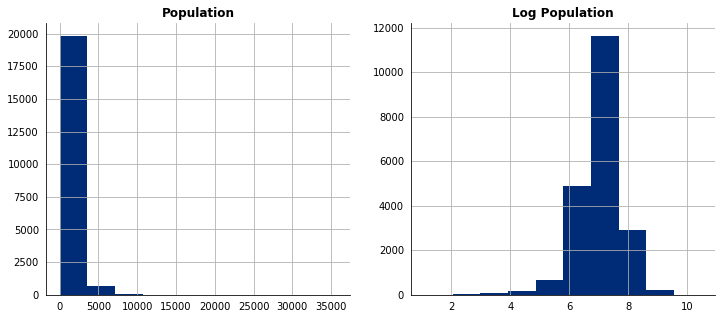

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
dataset['Population'].hist(ax=axs[0]); axs[0].set_title("Population")
dataset['Log_Population'].hist(ax=axs[1]); axs[1].set_title("Log Population");

## New heading

# Single Factor Analysis

Single Factor analysis explores the impact of each individual x-variable in a model. You can optionally specify a forced in set of variables, and use this analysis to find incremental variables.

You can use any linear model from sklearn for this: https://scikit-learn.org/stable/modules/linear_model.html, and possibly also other sklearn models (random forest, GBM etc.)

In [7]:
model = linear_model.LinearRegression(fit_intercept=True)
DV = "MedHouseVal"
IVs = ["MedInc", "AveBedrms", "Population", "Log_Population", "AveOccup"]
forced_in = ["HouseAge", "AveRooms"]
get_fitted = True

In [8]:
sfa_results, sfa_fitted_values = sklearn_regression_tools.sfa_linear_model(model, dataset, DV, IVs, forced_in, get_fitted=True)

Working on MedInc, which is #1 out of 5
Working on AveBedrms, which is #2 out of 5
Working on Population, which is #3 out of 5
Working on Log_Population, which is #4 out of 5
Working on AveOccup, which is #5 out of 5


**View single factor regression outputs**

In [9]:
sfa_results

,Variable,Forced In,# Obs,# Miss,Intercept,Var Coef,HouseAge Coef,AveRooms Coef,Rsq,Variance Explained,Variance Explained Beyond Forced In,RMSE,MAE
0,None,HouseAge|AveRooms,20640,0,1.2859,0.0000,0.0121,0.0803,0.0401,0.0401,NaN,1.1306,0.8872
1,MedInc,HouseAge|AveRooms,20640,0,0.0204,0.4428,0.0168,-0.0272,0.5121,0.5121,0.4917,0.8060,0.6000
2,AveBedrms,HouseAge|AveRooms,20640,0,1.5235,-1.5932,0.0153,0.3415,0.1594,0.1594,0.1243,1.0579,0.8298
3,Population,HouseAge|AveRooms,20640,0,1.2085,0.0000,0.0130,0.0820,0.0409,0.0409,0.0008,1.1301,0.8865
4,Log_Population,HouseAge|AveRooms,20640,0,0.7461,0.0690,0.0132,0.0846,0.0419,0.0419,0.0018,1.1295,0.8858
5,AveOccup,HouseAge|AveRooms,20640,0,1.2937,-0.0027,0.0121,0.0803,0.0407,0.0407,0.0006,1.1302,0.8868


In [10]:
sfa_fitted_values.head(5)

,Actual,ForcedInVars,MedInc,AveBedrms,Population,Log_Population,AveOccup
0,4.5260,2.3431,4.2066,2.9049,2.3227,2.2773,2.3448
1,3.5850,2.0411,3.8798,2.4267,2.0656,2.0884,2.0435
2,3.5210,2.5809,3.8834,3.4395,2.5776,2.5629,2.5822
3,3.4130,2.3825,3.2358,2.5964,2.3769,2.3620,2.3846
4,3.4220,2.4198,2.4275,2.7423,2.4152,2.4021,2.4229


**View and compare fitted values** 

We can use a scatter plot to compare the model fit for different regressions. To avoid plotting too many points, we limit the scatter plot to a sample of N data points.

Sampled 1000 out of 20640 observations


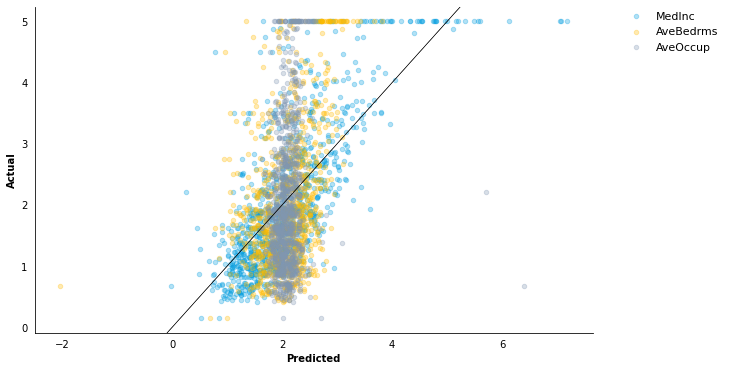

In [11]:
fig, ax = model_comparison.scatter_plot_comparison(frame = sfa_fitted_values, 
                                                   actual = "Actual",
                                                   predicted = ["MedInc", "AveBedrms", "AveOccup"],
                                                   N = 1000, 
                                                   colormap = ow_colormap("ow_full"),
                                                   equalize_axes = False)

**If the scatterplot is hard to read, we may also generate a binned actual vs. predicted plot.**

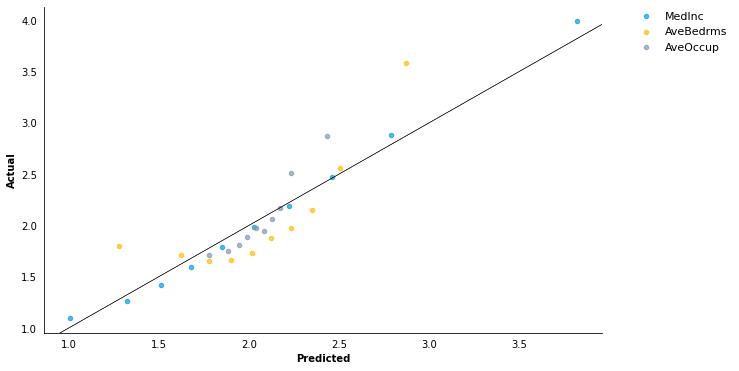

In [12]:
fig,ax, table = model_comparison.act_vs_pred_comparison(frame = sfa_fitted_values, 
                                                   actual = "Actual",
                                                   predicted = ["MedInc", "AveBedrms", "AveOccup"],
                                                   colormap = ow_colormap("ow_full"),
                                                   equalize_axes = False)

## Wrapper functions for SFA regression for popular model choices

In [143]:
# OLS regression
sklearn_regression_tools.sfa_ols

<function regression.sklearn_regression_tools.sfa_ols(dataset, DV, IVs, intercept=True, forced_in=None, get_fitted=True)>

In [144]:
# Poisson regression
sklearn_regression_tools.sfa_poisson

<function regression.sklearn_regression_tools.sfa_poisson(dataset, DV, IVs, intercept=True, forced_in=None, get_fitted=True)>

# Stepwise and subsets variable selection

Here we use methods provided by Sklearn and the more powerful methods provided by the mlextend library.

These methods require numerical x-variables. If you have categorical x-variables, you will want to transform them to numerical variables, through e.g. one-hot encoding (0-1 dummies)

## Using basic functionality provided by Sklearn

Sklearn provides simple feature selection for its linear models here https://scikit-learn.org/stable/modules/feature_selection.html. 

It provides two methods that are 'stepwise':
* Recursive Feature Elimination (RFE): Starts with the full set of variables, and recursively removes the least important variable to arrive at a smaller and smaller feature list.
* Sequential Feature Selector: Greedy forward and/or backward procedure to find best feature based on cross-validated score

It also provides two methods for selecting a subset variables in one step:
* SelectFromModel selects the top models based on an importance metric (such as coefficient, feature importance etc.) and threshold. Use of coefficient may be unreliable due to multicollinearity and lack of feature standardization
* SelectKBest selects the top K variables based on univariate relationship. The selected subset of variables can be prone to multicollinearity
These two methods are generally not recommended due to their limitations. However, you may want to use their analyses to make your own informed decision for which variables to select

In [13]:
from sklearn.feature_selection import RFE, SequentialFeatureSelector, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler

**We start by selecting the target and predictive variables, the model class, and number of x-variables to include at the end**

The number of variables to include can also be automatically selected for the Sequential Feature Selection method.

In [14]:
# Specify the key variables
target = "MedHouseVal"
candidate_x = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'Log_Population', 'AveOccup', 'Latitude', 'Longitude']

# Define the model
model = linear_model.LinearRegression(fit_intercept=True)

# Target variables
num_features=4

**We remove missing values from the data containing the target variable and candidate X-variables**

In [15]:
# Remove missing values
model_dataset = dataset[[target] + candidate_x].dropna()
print("Removed {} rows with missing values, to yield a model dataset of {} rows".format(dataset.shape[0] - model_dataset.shape[0], model_dataset.shape[0]))

# Split into Y and X datasets
Y = model_dataset[target]
X = model_dataset[candidate_x]

Removed 0 rows with missing values, to yield a model dataset of 20640 rows


### Recursive Feature Elimination (RFE) 

This starts from a model with all relevant variables. Thus the starting model cannot be multicollinear. Furthermore, it is recommended to standardize the X-variables to avoid favoring variables with smaller magnitude/variation.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [16]:
# Standardize the X dataset
scaler = StandardScaler()
X_trans = pd.DataFrame(scaler.fit_transform(X.values), index=X.index, columns=X.columns)

# Recursive feature elimination
selector = RFE(model, n_features_to_select=num_features, step=1, verbose=True)
selector = selector.fit(X_trans, Y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.


**We can get the variables selected**

In [17]:
selected_x=selector.get_feature_names_out().tolist()
selected_x

['MedInc', 'AveBedrms', 'Latitude', 'Longitude']

**We can also get the order of variables removed**

In [18]:
ranking = selector.ranking_
max_rank = max(ranking)
removed_variables_in_order = [candidate_x[ranking.tolist().index(x)] for x in reversed(range(2,max_rank+1))]
removed_variables_in_order

['Population', 'Log_Population', 'AveOccup', 'HouseAge', 'AveRooms']

**A more advanced version of RFE uses cross-validation called RFECV is available**

Read more here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

Example: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

**At its most basic**

In [36]:
from sklearn.feature_selection import RFECV
step = 1 # Number of variables to remove per step
selector = RFECV(model, min_features_to_select = 1, step=step).fit(X_trans, Y)
selector.get_feature_names_out().tolist()

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']

**Similarly we can get information about variables removed, as well as the cross-validated scores associated with each iteration in the recursive feature elimination**

In [37]:
# Get variable removed
ranking = selector.ranking_
max_rank = max(ranking)
removed_variables_in_order = [candidate_x[ranking.tolist().index(x)] for x in reversed(range(2,max_rank+1))]
removed_variables_in_order

['Population', 'Log_Population', 'AveOccup']

In [41]:
num_variables = []
current_num = X.shape[1]
for i in range(len(selector.cv_results_['mean_test_score'])):
    num_variables.append(X.shape[1] - current_num + 1)
    current_num = current_num - step

pd.DataFrame({
    "# Vars": num_variables,
    "CV score": selector.cv_results_['mean_test_score'],
    "Best?": [1 if x == max(selector.cv_results_['mean_test_score']) else 0 for x in selector.cv_results_['mean_test_score'] ]
})

,# Vars,CV score,Best?
0,1,-0.1224,0
1,2,0.1579,0
2,3,0.5331,0
3,4,0.5341,0
4,5,0.5440,0
5,6,0.5550,1
6,7,0.5539,0
7,8,0.5530,0
8,9,0.5530,0


**We can also define our own scoring method for the cross-validation**

We can create a scorer for Root Mean Square Error. RFE uses the cross-validated score to identify the stopping point for feature elimination, but it still uses the variable coefficient (or importance) to decide which variable to consider removing. This means that we should continue to standardize the x-variables

In [49]:
from sklearn.metrics import make_scorer, mean_squared_error

scorer = make_scorer(score_func = mean_squared_error, greater_is_better=False, squared=False)

from sklearn.feature_selection import RFECV
step = 1 # Number of variables to remove per step
selector = RFECV(model, scoring=scorer, min_features_to_select = 1, step=step).fit(X_trans, Y)
selector.get_feature_names_out().tolist()

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']

In [51]:
RMSE_scorer._sign

-1

**To see the scores by number of variables. Since smaller RMSE is better, the test scores have been multiplied -1 to ensure that Greater is better**

In [52]:
num_variables = []
current_num = X.shape[1]
for i in range(len(selector.cv_results_['mean_test_score'])):
    num_variables.append(X.shape[1] - current_num + 1)
    current_num = current_num - step

pd.DataFrame({
    "# Vars": num_variables,
    "CV score": RMSE_scorer._sign * selector.cv_results_['mean_test_score'],
    "Best?": [1 if x == max(selector.cv_results_['mean_test_score']) else 0 for x in selector.cv_results_['mean_test_score'] ]
})

,# Vars,CV score,Best?
0,1,1.1847,0
1,2,1.0243,0
2,3,0.7614,0
3,4,0.7606,0
4,5,0.7530,0
5,6,0.7439,1
6,7,0.7452,0
7,8,0.7459,0
8,9,0.7459,0


**We can also plot the scores**

<ErrorbarContainer object of 3 artists>

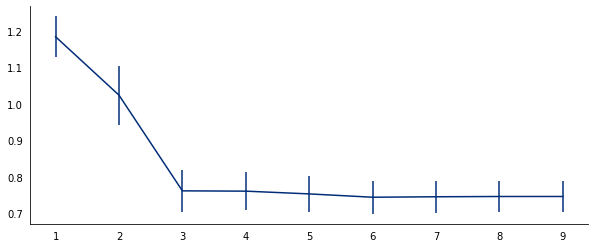

In [65]:
fig, ax = plt.subplots(figsize=(10,4))
# ax.plot(num_variables, RMSE_scorer._sign * selector.cv_results_['mean_test_score'])
ax.errorbar(num_variables, RMSE_scorer._sign * selector.cv_results_['mean_test_score'], 
            yerr = selector.cv_results_['std_test_score'])

### Sequential Feature Selector

We can use forward or backward selection using the sequential feature selection method. Backward selection is similar to (but not the same as) RFE, as SFS uses cross-validation score instead of variable coefficient / importance.

Read more here: https://scikit-learn.org/stable/modules/feature_selection.html#sequential-feature-selection

In [86]:
sfs = SequentialFeatureSelector(model, n_features_to_select='auto', direction='forward')
sfs = sfs.fit(X_trans, Y)

**We can get the variables selected**

In [93]:
selected_x = sfs.get_feature_names_out().tolist()
selected_x

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']

### SelectFromModel

Similar to RFE in that it selects variables from an existing model, however, this does it in one single step, and is therefore more vulnerable to dependencies / multicollinearity between x-variables.

If using coefficients to determine importance, it is suggested that you standardize the x-variables. (Standardizing doesn't hurt either for other types of variable importance metrics)

Read about the options here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [90]:
# Standardize the X dataset
scaler = StandardScaler()
X_trans = pd.DataFrame(scaler.fit_transform(X.values), index=X.index, columns=X.columns)

selector = SelectFromModel(model, threshold="mean", max_features = 5)
selector = selector.fit(X_trans, Y)


**Selected variables**

In [94]:
selected_x = selector.get_feature_names_out().tolist()
selected_x

['MedInc', 'Latitude', 'Longitude']

### SelectKBest

SelectKBest selects the top K variables based on their univariate relationship with the target variable. This doesn't take into account correlations between the x-variables, and may select quite similar variables that don't add much to eachother in a multi-variate model.

The SelectKBest requires a scoring function for the univariate relationship. One can build one using e.g. r-squared, or one can use the existing:
* F regression suitable for when the relationship is somewhat linear: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression
* Mutual information regression: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression

In [99]:
from sklearn.feature_selection import f_regression, mutual_info_regression
selector = SelectKBest(f_regression, k = 3).fit(X, Y) # Select top 3 features based on f_regression

**Selected variables**

In [100]:
selected_x = selector.get_feature_names_out().tolist()
selected_x

['MedInc', 'AveRooms', 'Latitude']

**Custom scoring function**

In [148]:
from sklearn.metrics import r2_score

def r2_score_generator(model):

    def r2_score_func(X, y):
        scores = []

        for i in range(X.shape[1]):
            X_i = X[:,i].reshape(-1,1)
            model_i = model.fit(X_i, y)
            pred = model_i.predict(X_i)

            score_i = r2_score(y, X_i)
            scores.append(score_i)
            
        return np.array(scores)
    
    return r2_score_func

model_choice = linear_model.LinearRegression(fit_intercept=True)
custom_selector = SelectKBest(r2_score_generator(model_choice), k = 3).fit(X, Y) # Select top 3 features based on r2 from linear regression

**Selected variables**

In [149]:
selected_x = selector.get_feature_names_out().tolist()
selected_x

['MedInc', 'AveRooms', 'Latitude']

## Using mlextend's Stepwise search

mlextend augments the sklearn library with additional variable selection techniques and additional information to help select the appropriate model.

It uses similar syntax as sklearn. Read more here: http://rasbt.github.io/mlxtend/user_guide/

It offers 4 types of stepwise search methods (http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/): 
* Sequential Forward Selection (SFS)
* Sequential Backward Selection (SBS)
* Sequential Forward Floating Selection (SFFS)
* Sequential Backward Floating Selection (SBFS)

The floating variants, SFFS and SBFS, can be considered as extensions to the simpler SFS and SBS algorithms. The floating algorithms have an additional exclusion or inclusion step to remove features once they were included (or excluded), so that a larger number of feature subset combinations can be sampled. It is important to emphasize that this step is conditional and only occurs if the resulting feature subset is assessed as "better" by the criterion function after removal (or addition) of a particular feature. 

For syntax help, see: http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/#sequentialfeatureselector

In [66]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

**Select target, x-variables, and model type**

In [92]:
# Specify the key variables
target = "MedHouseVal"
candidate_x = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'Log_Population', 'AveOccup', 'Latitude', 'Longitude']

# Define the model
model = linear_model.LinearRegression(fit_intercept=True)

### Forward selection

Here we have requested the use of r-squared as metric. And we consider up to 6 features.

In [94]:
sfs = SFS(model, k_features=6, forward=True, floating=False, scoring='r2', cv=5)
sfs = sfs.fit(X, Y)

**Table with the outcomes at each iteration**

cv_scores are r-squared scores associated with the 5 cross-validation folds. The avg_score is the average across the 5 folds. The ci_bound, std_dev, and std_err provide information about the variability across the five folds and are used an uncertainty metrics.

In [101]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.4645838932053594, 0.35374042999171984, 0.46...",0.4214,"(MedInc,)",0.1077,0.0838,0.0419
2,"(0, 1)","[0.47639118662409796, 0.3869912980836958, 0.48...",0.4587,"(MedInc, HouseAge)",0.0753,0.0586,0.0293
3,"(0, 1, 2)","[0.4607170006407755, 0.3949188332339916, 0.489...",0.4593,"(MedInc, HouseAge, AveRooms)",0.0727,0.0565,0.0283
4,"(0, 1, 2, 3)","[0.5104907198522659, 0.4386801325856957, 0.512...",0.4935,"(MedInc, HouseAge, AveRooms, AveBedrms)",0.0546,0.0425,0.0212
5,"(0, 1, 2, 3, 5)","[0.5117442028611139, 0.43935359589897727, 0.50...",0.4933,"(MedInc, HouseAge, AveRooms, AveBedrms, Log_Po...",0.0541,0.0421,0.0210
6,"(0, 1, 2, 3, 4, 5)","[0.5111969881347904, 0.4393597575540238, 0.507...",0.4930,"(MedInc, HouseAge, AveRooms, AveBedrms, Popula...",0.0538,0.0418,0.0209


**Plot of the score at each iteration**

We can get a visual view of the performance, by plotting the average score with the standard errors.

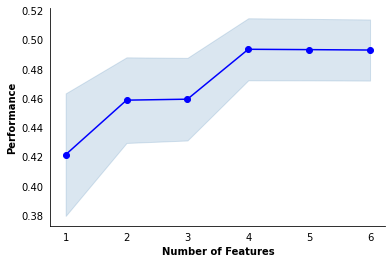

In [96]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

**In this case, it may be sufficient to use 4 features, namely**

In [108]:
list(sfs.subsets_[4]['feature_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']

### Backward selection (with floating algorithm)

Regular backward selection is achieved by changing the argument 'forward' to False. 

By setting the argument 'floating' to True, we get a more advanced version. The floating algorithms have an additional exclusion or inclusion step to remove features once they were included (or excluded), so that a larger number of feature subset combinations can be sampled.

**Note: With backward selection in general, the model starts with all candidate variables, so make sure to avoid multicollinear combinations**

Here, we consider down to 2 features.

In [112]:
sfs = SFS(model, k_features=2, forward=False, floating=True, scoring='r2', cv=5)
sfs = sfs.fit(X, Y)

In [113]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.5486201869729368, 0.4681827151487459, 0.550...",0.5530,"(MedInc, HouseAge, AveRooms, AveBedrms, Popula...",0.0793,0.0617,0.0308
8,"(0, 1, 2, 3, 4, 5, 7, 8)","[0.5488514825927339, 0.4663171525534776, 0.550...",0.5540,"(MedInc, HouseAge, AveRooms, AveBedrms, Popula...",0.0842,0.0655,0.0327
7,"(0, 1, 2, 3, 5, 7, 8)","[0.5488625960697957, 0.46635760867448006, 0.55...",0.5542,"(MedInc, HouseAge, AveRooms, AveBedrms, Log_Po...",0.0842,0.0655,0.0328
6,"(0, 1, 2, 3, 7, 8)","[0.5493568906402934, 0.4669622904089422, 0.551...",0.5550,"(MedInc, HouseAge, AveRooms, AveBedrms, Latitu...",0.0839,0.0653,0.0326
5,"(0, 1, 3, 7, 8)","[0.5416438941618367, 0.4504388635263684, 0.548...",0.5458,"(MedInc, HouseAge, AveBedrms, Latitude, Longit...",0.0920,0.0716,0.0358
4,"(0, 1, 7, 8)","[0.5562912113500209, 0.4477867834639666, 0.538...",0.5448,"(MedInc, HouseAge, Latitude, Longitude)",0.0938,0.0730,0.0365
3,"(0, 7, 8)","[0.568995045996352, 0.43087935360134355, 0.534...",0.5331,"(MedInc, Latitude, Longitude)",0.1009,0.0785,0.0393
2,"(0, 7)","[0.4985834349824716, 0.38500079639128015, 0.47...",0.4200,"(MedInc, Latitude)",0.1430,0.1112,0.0556


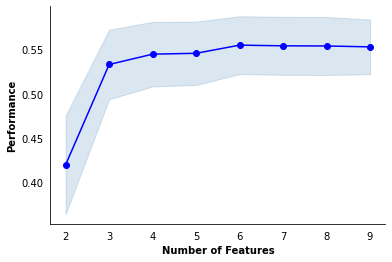

In [114]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

In [116]:
list(sfs.subsets_[3]['feature_names'])

['MedInc', 'Latitude', 'Longitude']

### Additional capabilities of mlextend's sequential search

**We can force in specific variables into the model, so they are always selected by using the 'fixed_features' argument**

fixed_features are provided as a tuple. For example, if fixed_features=(1, 3, 7), the 2nd, 4th, and 8th feature are guaranteed to be present in the solution. It is important that k_features is greater than the number of fixed features.

In [121]:
# We can easily convert a list of features into a tuple
forced_in_features = ['MedInc', 'AveBedrms']
forced_in_tuple = tuple([X.columns.tolist().index(x) for x in forced_in_features])
forced_in_tuple

(0, 3)

In [124]:
sfs = SFS(model, k_features=5, forward=True, floating=True, scoring='r2', cv=5, fixed_features=forced_in_tuple)
sfs = sfs.fit(X, Y)
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
2,"(0, 3)","[0.4639729499206273, 0.35381496074528473, 0.46...",0.4213,"(MedInc, AveBedrms)",0.1077,0.0838,0.0419
3,"(0, 2, 3)","[0.49229523447766665, 0.4238389370072473, 0.49...",0.4646,"(MedInc, AveRooms, AveBedrms)",0.0778,0.0606,0.0303
4,"(0, 1, 2, 3)","[0.5104907198522659, 0.4386801325856957, 0.512...",0.4935,"(MedInc, HouseAge, AveRooms, AveBedrms)",0.0546,0.0425,0.0212
5,"(0, 1, 2, 3, 5)","[0.5117442028611139, 0.43935359589897727, 0.50...",0.4933,"(MedInc, HouseAge, AveRooms, AveBedrms, Log_Po...",0.0541,0.0421,0.0210


**We can also ask the algorithm to automatically pick the best model or a parsimonious model**

If "best" is provided, the feature selector will return the feature subset with the best cross-validation performance. 

If "parsimonious" is provided as an argument, the smallest feature subset that is within one standard error of the cross-validation performance will be selected.

In [134]:
sfs = SFS(model, k_features='best', forward=False, floating=False, scoring='r2', cv=5)
sfs = sfs.fit(X, Y)
sfs.k_feature_names_

('MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude')

In [135]:
sfs = SFS(model, k_features='parsimonious', forward=False, floating=False, scoring='r2', cv=5)
sfs = sfs.fit(X, Y)
sfs.k_feature_names_

('MedInc', 'Latitude', 'Longitude')

## Using mlextend's Exhaustive search (all combinations)

Exhaustive search considers all possible combinations of independent variables up to a specific size (number of variables in the model). This is feasible if there is a relatively small number of candidate variables and/or you are looking for small sets of variables in any given model. 

Syntax for this is at: http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/#exhaustivefeatureselector

In [138]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

sfs = EFS(model, min_features=2, max_features=4, print_progress=True, scoring='r2', cv=5)
sfs = sfs.fit(X, Y)

Features: 246/246

**We can sort the outputs by average score, and create a column indicating the number of variables**

In [141]:
output_table = pd.DataFrame.from_dict(sfs.get_metric_dict()).T.sort_values('avg_score', ascending=False)
output_table['num_vars'] = output_table['feature_idx'].apply(lambda x: len(x))
output_table

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,num_vars
140,"(0, 1, 7, 8)","[0.5562912113500209, 0.4477867834639666, 0.538...",0.5448,"(MedInc, HouseAge, Latitude, Longitude)",0.0938,0.0730,0.0365,4
165,"(0, 3, 7, 8)","[0.5598118858963068, 0.43224118447544746, 0.54...",0.5341,"(MedInc, AveBedrms, Latitude, Longitude)",0.0980,0.0762,0.0381,4
174,"(0, 5, 7, 8)","[0.5634955647051503, 0.42934226445383483, 0.54...",0.5339,"(MedInc, Log_Population, Latitude, Longitude)",0.1011,0.0787,0.0393,4
171,"(0, 4, 7, 8)","[0.5639702398124992, 0.42972247905832817, 0.53...",0.5336,"(MedInc, Population, Latitude, Longitude)",0.1012,0.0787,0.0394,4
63,"(0, 7, 8)","[0.5689950459963611, 0.4308793536013449, 0.534...",0.5331,"(MedInc, Latitude, Longitude)",0.1009,0.0785,0.0393,3
...,...,...,...,...,...,...,...,...
235,"(3, 4, 6, 8)","[-0.32025281258465954, -0.04045538908653268, -...",-0.1341,"(AveBedrms, Population, AveOccup, Longitude)",0.1256,0.0977,0.0489,4
114,"(4, 6, 8)","[-0.31083863946182344, -0.043584402686428714, ...",-0.1351,"(Population, AveOccup, Longitude)",0.1194,0.0929,0.0464,3
238,"(3, 5, 6, 8)","[-0.3263719121230779, -0.04073409248261095, -0...",-0.1353,"(AveBedrms, Log_Population, AveOccup, Longitude)",0.1285,0.1000,0.0500,4
117,"(5, 6, 8)","[-0.31378693988596895, -0.045190892336411714, ...",-0.1361,"(Log_Population, AveOccup, Longitude)",0.1203,0.0936,0.0468,3


**Note: There are branch-and-bound algorithms to identify (approximately) the top subsets of variables in other programming languages**

* R has the regsubsets function: https://www.rdocumentation.org/packages/leaps/versions/3.1/topics/regsubsets
* SAS has subsets selection for OLS, Logistic, and a few other regressions

Please let us know if you are aware of good Python implementations of a heuristic best subsets algorithm.

Genetic algorithms may provide a good solution. A code implementation is to come. There is also a library here: https://abess.readthedocs.io/en/latest/

# Use of regularized regression (LASSO) for variable selection

Regularized regression with L1 penalty (sum of absolute value of coefficients) can be used to eliminate variables. Sklearn provides LASSO (and Elastic Net).

These are available for linear model relationships and not generalized-linear. However, as a heuristic tool, it is acceptable to use it with generalized linear models by transforming the dependent variable values (e.g. log-transform for Poisson regression). 

Here we will just use LASSO Regression. See the 'regression calibration notebook' for details on Elastic Net. 

**We have created a lasso_linear_regression function that simplifies the process (automatically standardizes variables and allows for forced in variables)**

For purposes of variable selection to identify potential candidate models for e.g. OLS regression, rather than calibrating a single LASSO model, we run LASSO without cross-validation and tuning. 

In [157]:
lasso_variables = sklearn_regression_tools.lasso_linear_regression(
    dataset = dataset,
    DV = 'MedHouseVal', # dependent variable (target),
    IVs = candidate_x, # independent variables (candidate x-variables)
    forced_in = ['AveBedrms'],
    intercept=True,
    alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 2.5, 5, 10] # Wide range of LASSO penalties to use. Higher penalty = fewer variables.
)
# You can tweak the alpha_list if most penalties result in the same list of variables

lasso_variables

,Alpha,Variables,Converged?,Rsq,Intercept,AveBedrms Coef,AveOccup Coef,Log_Population Coef,Latitude Coef,AveRooms Coef,MedInc Coef,HouseAge Coef,Population Coef,Longitude Coef
0,0.0001,AveBedrms;AveOccup;Log_Population;Latitude;Ave...,True,0.6063,2.0686,0.3029,-0.0394,-0.0154,-0.9010,-0.2644,0.8287,0.1182,0.0073,-0.8709
1,0.0010,AveBedrms;AveOccup;Log_Population;Latitude;Ave...,True,0.6063,2.0686,0.2976,-0.0384,-0.0105,-0.8896,-0.2588,0.8268,0.1185,0.0026,-0.8594
2,0.0050,AveBedrms;AveOccup;Log_Population;Latitude;Ave...,True,0.6056,2.0686,0.2719,-0.0347,-0.0026,-0.8391,-0.2324,0.8177,0.1215,-0.0000,-0.8080
3,0.0100,AveBedrms;AveOccup;Latitude;AveRooms;MedInc;Ho...,True,0.6037,2.0686,0.2388,-0.0300,-0.0000,-0.7776,-0.1995,0.8060,0.1243,-0.0000,-0.7450
4,0.0500,AveBedrms;Latitude;MedInc;HouseAge;Longitude,True,0.5463,2.0686,0.0248,-0.0000,0.0000,-0.2733,-0.0000,0.7369,0.1397,0.0000,-0.2298
5,0.1000,AveBedrms;Latitude;MedInc;HouseAge,True,0.4937,2.0686,-0.0010,-0.0000,0.0000,-0.0111,-0.0000,0.7056,0.1059,-0.0000,-0.0000
6,0.2500,AveBedrms;MedInc,True,0.4264,2.0686,-0.0200,-0.0000,-0.0000,-0.0000,0.0000,0.5428,0.0000,-0.0000,-0.0000
7,0.5000,AveBedrms;MedInc,True,0.2850,2.0686,-0.0353,-0.0000,-0.0000,-0.0000,0.0000,0.2918,0.0000,-0.0000,-0.0000
8,0.7500,AveBedrms;MedInc,True,0.0494,2.0686,-0.0506,-0.0000,-0.0000,-0.0000,0.0000,0.0408,0.0000,-0.0000,-0.0000
9,1.0000,AveBedrms,True,0.0022,2.0686,-0.0529,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000


# Selection from custom list of multifactor regression results

After using variable selection such as those techniques above, or through expert judgment, you will arrive at a list of candidate models. This list could still be very long (e.g. if identified through exhaustive search) so you don't want to review each model separately. Instead you want to run a large number of regressions for comparison.

We have available a Multifactor regression function that provides these capabilities. You specify the following:
* Model class, e.g. LinearRegression()
* Dataset
* Table with variable names (with column names 'Var 1', 'Var 2', 'Var 3', etc.)
* Whether to return the fitted values

When examining a large number of models at once, we avoid looking at out-of-sample results to avoid overfitting based on out of sample. Models that perform reasonably in-sample (not necessarily the best fit) and are sensible, are then examined further in out-of-sample testing.

In [171]:
# We create a dataframe with the x-variables in the candidate model to consider. 
# We can use the output from the lasso regression previously

lasso_variable_index = [3,4,6]
x_var_table = lasso_variables.loc[lasso_variable_index, "Variables"].apply(lambda x: pd.Series(x.split(';')))
x_var_table.columns = ["Var {}".format(int(i)+1) for i in x_var_table.columns]
x_var_table

,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7
3,AveBedrms,AveOccup,Latitude,AveRooms,MedInc,HouseAge,Longitude
4,AveBedrms,Latitude,MedInc,HouseAge,Longitude,NaN,NaN
6,AveBedrms,MedInc,NaN,NaN,NaN,NaN,NaN


In [181]:
summary, fitted = sklearn_regression_tools.mfa_linear_models(
    model, 
    dataset = dataset,
    DV = 'MedHouseVal', # dependent variable (target),
    IV_table = x_var_table, # independent variables (candidate x-variables)
    get_fitted=True
)

summary

Working on model 1 out of 3
Working on model 2 out of 3
Working on model 3 out of 3


,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7,# Obs,# Miss,Intercept,...,Var 3 Coef,Var 4 Coef,Var 5 Coef,Var 6 Coef,Var 7 Coef,Rsq,Variance Explained,RMSE,MAE,Max_VIF
0,AveBedrms,AveOccup,Latitude,AveRooms,MedInc,HouseAge,Longitude,20640,0,-36.9175,...,-0.4207,-0.1071,0.4368,0.0096,-0.4340,0.6062,0.6062,0.7241,0.5312,9.2008
1,AveBedrms,Latitude,MedInc,HouseAge,Longitude,NaN,NaN,20640,0,-39.7938,...,0.3791,0.0098,-0.4721,NaN,NaN,0.5988,0.5988,0.7309,0.5399,8.2631
2,AveBedrms,MedInc,NaN,NaN,NaN,NaN,NaN,20640,0,0.4622,...,NaN,NaN,NaN,NaN,NaN,0.4735,0.4735,0.8373,0.6262,1.0039


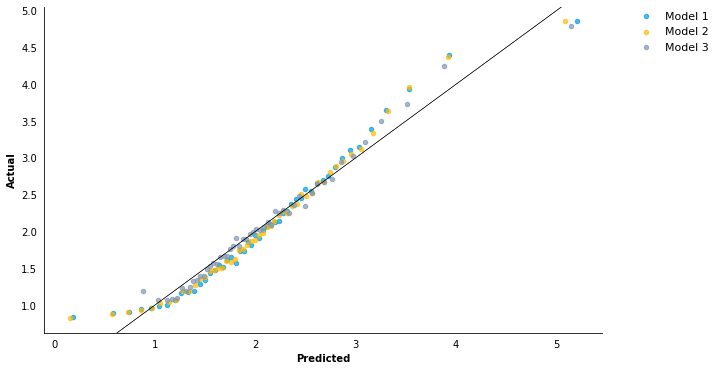

In [180]:
# Rapid comparison of the 3 models
fig,ax, table = model_comparison.act_vs_pred_comparison(frame = fitted, 
                                                   actual = "Actual",
                                                   predicted = ["Model 1", "Model 2", "Model 3"],
                                                   colormap = ow_colormap("ow_full"),
                                                   bins = 50,
                                                   equalize_axes = False)

# Experimental methods

## Custom step-wise methods for Generalized Linear Models

In the glm_regression.py file, we have created functionality for calibrating generalized linear models (with p-values) and performing forward and subsets selection for OLS (and Logistic regression).

Estimation of these GLM models are covered in further detail in the Experimental Methods in the sklearn Model Calibration and Fit notebook.

In [184]:
# Import the module
from regression import glm_regression

In [185]:
# Remove missing values
model_dataset = dataset[[target] + candidate_x].dropna()
print("Removed {} rows with missing values, to yield a model dataset of {} rows".format(dataset.shape[0] - model_dataset.shape[0], model_dataset.shape[0]))

# Split into Y and X datasets
Y = model_dataset[target]
X = model_dataset[candidate_x]

Removed 0 rows with missing values, to yield a model dataset of 20640 rows


**OLS Regression - Forward selection**

In [194]:
best_results, best_models, master_results = glm_regression.forward(
    X = X, 
    y = Y, 
    max_var = 6, # Number of variables in addition to forced in variables
    regression_type = "OLS", 
    weight = None, 
    forced_in = ["AveRooms"])

pd.DataFrame(best_results)

Processed  8 models on 1 predictors in 0.04699540138244629 seconds.
Processed  7 models on 2 predictors in 0.051004648208618164 seconds.
Processed  6 models on 3 predictors in 0.046999216079711914 seconds.
Processed  5 models on 4 predictors in 0.03500175476074219 seconds.
Processed  4 models on 5 predictors in 0.028995037078857422 seconds.
Processed  3 models on 6 predictors in 0.03100419044494629 seconds.


,statistic,value,num_var,vars,Vars
0,RSS,"14,307.4541",2,"[AveRooms, MedInc]","[AveRooms, MedInc]"
1,RSS,"13,409.0006",3,"[AveRooms, MedInc, HouseAge]","[AveRooms, MedInc, HouseAge]"
2,RSS,"12,711.2812",4,"[AveRooms, MedInc, HouseAge, AveBedrms]","[AveRooms, MedInc, HouseAge, AveBedrms]"
3,RSS,"12,621.8180",5,"[AveRooms, MedInc, HouseAge, AveBedrms, Latitude]","[AveRooms, MedInc, HouseAge, AveBedrms, Latitude]"
4,RSS,"10,854.7700",6,"[AveRooms, MedInc, HouseAge, AveBedrms, Latitu...","[AveRooms, MedInc, HouseAge, AveBedrms, Latitu..."
5,RSS,"10,822.3529",7,"[AveRooms, MedInc, HouseAge, AveBedrms, Latitu...","[AveRooms, MedInc, HouseAge, AveBedrms, Latitu..."


**Poisson Regression - Exhaustive search**

In [195]:
models, subset_results = glm_regression.getBest(
    X = X, 
    y = Y, 
    min_var = 1, # Number of variables in addition to forced in variables
    max_var = 3, # Number of variables in addition to forced in variables
    regression_type = "OLS", 
    weight = None, 
    forced_in = ["AveRooms"])

subset_results.sort_values("value")

Processed 8 models on 1 predictors in 0.0400 seconds.
Processed 28 models on 2 predictors in 0.1420 seconds.
Processed 56 models on 3 predictors in 0.3910 seconds.


,statistic,value,num_var,vars,index
78,RSS,"11,402.1936",4,"[AveRooms, Latitude, MedInc, Longitude]",78
82,RSS,"12,711.2812",4,"[AveRooms, AveBedrms, MedInc, HouseAge]",82
76,RSS,"13,219.9383",4,"[AveRooms, Latitude, MedInc, HouseAge]",76
51,RSS,"13,364.7334",4,"[AveRooms, AveOccup, MedInc, HouseAge]",51
88,RSS,"13,394.2234",4,"[AveRooms, MedInc, HouseAge, Population]",88
...,...,...,...,...,...
13,RSS,"26,830.0692",3,"[AveRooms, AveOccup, Population]",13
8,RSS,"26,833.3859",3,"[AveRooms, AveOccup, Log_Population]",8
0,RSS,"26,834.1192",2,"[AveRooms, AveOccup]",0
6,RSS,"26,843.4903",2,"[AveRooms, Population]",6
